## CARGA DE DATOS

* pickle.load
* numpy.genfromtxt

In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random
import seaborn as sns

In [ ]:
x = 0
y = 1
plt.plot(x, y, marker = "*")

plt.grid()
plt.show()

In [ ]:
x = [1, 10]
y = [-1, 8]

plt.plot(x, y, marker = "o")


# Esta función la podemos usar para marcar el eje X
plt.axhline(0, color = "red")

# Esta función la podemos usar para marcar el eje Y
plt.axvline(0, color = "green") 

plt.grid()
plt.show()

In [ ]:
x = np.linspace(1, 10, 10)
y = [-3, 7, 10, 6, 3, 9, 0, -6, 2, 9]

plt.plot(x, y, marker = "o", color = "red")

# Eje X
plt.axhline(0, color = "green")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()

In [ ]:
X = [random.randint(-20, 20) for x in range(20)]
Y = [random.randint(-20, 20) for x in range(20)]

plt.scatter(X, Y)

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()


In [66]:
#cargar un dataset en numpy



In [ ]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
          city_consumption = pkl.load(f)
       
          
city_consumption

In [ ]:
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
city_consumption
road_consumption
manufacturers

## MAX MIN MEAN MEDIAN ROUND

In [122]:
print(manufacturers.dtype)
print(manufacturers.shape)


<U13
(1067,)


In [ ]:
print(f"Consumo medio en ciudad: {np.round(np.mean(city_consumption),2):.2f}")
print(f"Coche que mas consume en ciudad: {np.round(np.max(city_consumption),2):.2f}")
print(f"Coche que menos consume en ciudad: {np.round(np.min(city_consumption),2):.2f}")
print(f"Consumo mediana en ciudad: {np.round(np.median(city_consumption),2):.2f}")
print(f"Consumo medio en carretera: {np.round(np.mean(road_consumption),2):.2f}")
print(f"Coche que mas consume en carretera: {np.round(np.max(road_consumption),2):.2f}")
print(f"Coche que menos consume en carretera: {np.round(np.min(road_consumption),2):.2f}")
print(f"Consumo mediana en carretera: {np.round(np.median(road_consumption),2):.2f}")

## HISTOGRAMA

In [ ]:
plt.hist(city_consumption, bins=30); # el punto y como final evita que aparezca el array
plt.grid()#bins es la cantidad de barras del histograma

In [ ]:
plt.hist(road_consumption, bins=30);
plt.grid()

In [ ]:
#superponer los graficos
plt.hist(city_consumption, bins=30);
plt.hist(road_consumption, bins=30);
plt.xlabel("Consumo en litros")
plt.ylabel("Cantidad coches")
plt.grid()

## QUANTILES Y PERCENTILES

In [ ]:
np.quantile(a = city_consumption, q= 0.25, interpolation = "lower") #primer quartil
np.quantile(a = city_consumption, q= 0.5, interpolation = "lower")  #segundo quartil 
np.quantile(a = city_consumption, q= 0.75, interpolation = "lower") #te4rmer quartil
np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower")

In [ ]:
# Filtros: mascara booleana
city_consumption[city_consumption >= 26]
#np.where

## RANGO

In [ ]:
#Rango
print(f"Rango consumo ciudad: {round(np.max(city_consumption) - np.min(city_consumption),2):.2f}") #con redondeo y dos decimales
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")


In [ ]:
#rango quartiles rango intercuartilico IQR
# 1,5 veces mas alla del iqr se consideran valores anomalos o outliers
q1 = np.quantile (a= city_consumption, q= 0.25, interpolation = "lower")
q3 = np.quantile (a= city_consumption, q= 0.75, interpolation = "lower")
iqr = q3-q1
print(f"Rango intercuartilico IQR: {iqr}")

## PINTAR LINEAS EN UN GRAFICO

In [ ]:
#pintar media, mediana, q1, q3, min, max en un histograma
c_mini = np.min(road_consumption)
c_maxi = np.max(road_consumption)
c_media = np.mean(city_consumption)
c_mediana = np.median(city_consumption)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=30, color='skyblue', alpha=0.5)
plt.axvline(q1, color='red', linestyle= 'dashed', linewidth=2, label=(f"Q1: {q1:.1f}"))
plt.axvline(q3, color='green', linestyle= 'dashed', linewidth=2, label=(f"Q3: {q3:.1f}"))
plt.axvline(c_mini, color='orange', linestyle= 'dashed', linewidth=2, label=(f"Min: {c_mini:.1f}"))
plt.axvline(c_maxi, color='black', linestyle= 'dashed', linewidth=2, label=(f"Max: {c_maxi:.1f}"))
plt.axvline(c_media, color= 'grey', linestyle= 'dashed', linewidth=2, label=(f"mean: {c_media:.1f}"))
plt.axvline(c_mediana, color= 'blue', linestyle= 'dashed', linewidth=2, label=(f"median: {c_mediana:.1f}"))
plt.legend() 
plt.show()

#plt.grid()



## BOXPLOT

In [ ]:
#boxplot calcula y muestra los valores IQR, max, min,,mediana
#plt.boxplot(city_consumption); #showmeans= True me mostraría tambien la media
plt.boxplot(city_consumption, showmeans=True, orientation="horizontal")
plt.grid()

## FILTRAR

In [ ]:
#Filtrar usando percentiles
print(np.percentile(city_consumption, 10)) #es lo mismo uno que otro
print(np.quantile(city_consumption, 0.1))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {round(percentil_10 ,2):.2f}") #aca se ve mejor el redondeo y como se muestra
print(f"percentil 90: {percentil_90}")


#coches que menos consumen
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]
#coches que mas consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
# print(coches_menor_consumo.shape)
print(f"media: {round(np.mean(coches_menor_consumo),2):.2f}")
print("10 % coches mayor consumo")
# print(coches_mayor_consumo.shape)
print(f"media: {round(np.mean(coches_mayor_consumo),2):.2f}")

## VARIANZA Y DESVIO ESTANDAR

In [ ]:
#Varianza: Que dispersion tienen los datos con respecto a la media
varianza = np.var(city_consumption)
print(f"Varianza: {varianza}")

#Desviación estandar: raiz cuadrada de la varianza
desviacion = np.std(city_consumption)
print(f"Desviacion estandar: {desviacion:.2f}")

## COUNTER

In [ ]:
#contar cuantos coches hay de cada marca
conteo = Counter(manufacturers)

#guardar los 10 fabricantes que mas se repiten en este dataset
top_10 = conteo.most_common(10)

#mostrarlo con mejor formato
for fabri, count in top_10:
    print(f"Fabricante  {fabri} tiene {count} coches")

#desempaquetar en dos array
fabricantes, conteos = zip(*top_10)

top_10
print(fabricantes)
print(conteos)


#moda de manufacturers


In [ ]:
#grafico de barras
plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos)
plt.xticks(rotation=45); #o bien utilizar plt.barh
plt.grid()

In [ ]:
plt.barh(fabricantes, conteos)
plt.grid()

## FUNCION OUTLINERS

In [85]:
#metodo para ver outliers
def filtrar_outliers(array, k):
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1
    limite_inf = Q1 - IQR * k
    limite_sup = Q3 + IQR * k
    array_sin_outliers = array[(array >= limite_inf) & (array <= limite_sup)]
    return array_sin_outliers

In [ ]:
city_consumption.shape #1067 vehiculos
array_sin_outliners = filtrar_outliers(city_consumption, k=1.3)
print(city_consumption.shape)
print(array_sin_outliners.shape)

## Correlacion
- 0: asociación nula. No hay correlacion
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.

* -1 correlación negativa


In [ ]:
#Correlacion  entre dos variables 09.estadistica.03
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
engine_cc = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1, dtype=np.float32)
co2_emissions = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1, dtype=np.float32)
cylinders = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emissions)
print(engine_cc)
print(cylinders)


In [ ]:
print(f"cylinders / citi_consumption: {stats.pearsonr(cylinders, city_consumption)[0]}") 
print(f"cylinders / cylinders: {stats.pearsonr(cylinders, cylinders)[0]}")
print(f"cylinders / road_consumption: {stats.pearsonr(cylinders, road_consumption)[0]}")
print(f"cylinders / engyne_cc: {stats.pearsonr(cylinders, engine_cc)[0]}")
print(f"cylinders / co2_emissions: {stats.pearsonr(cylinders, co2_emissions)[0]}")
#correlacion ALTA entre cilindros y consumo en ciudad

In [ ]:
print(f"co2_emissions / citi_consumption: {stats.pearsonr(co2_emissions, city_consumption)[0]}") 
print(f"co2_emissions / cylinders: {stats.pearsonr(co2_emissions, cylinders)[0]}")
print(f"co2_emissions / road_consumption: {stats.pearsonr(co2_emissions, road_consumption)[0]}")
print(f"co2_emissionss / engyne_cc: {stats.pearsonr(co2_emissions, engine_cc)[0]}")
print(f"co2_emissions / co2_emissions: {stats.pearsonr(co2_emissions, co2_emissions)[0]}")
#

## MATRIZ CORRELACION CON DOS BUCLES FOR

In [ ]:
#matriz correlacion con dos bucles for
columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emissions]

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
        
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)


In [ ]:
column_names = ['engine_cc', 'city_consumption', 'road_consumption', 'cylinders', 'co2_emissions']
#plt.imshow(matriz, cmap="inferno", vmax=1, vmin=-1)
plt.imshow(matriz, cmap="viridis")
#plt.imshow(np.tril(matriz, cmap="viridis"))
plt.colorbar(label="correlacion")
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position("top")

## SEABORN

In [ ]:
# !pip install seaborn
# import seaborn as sns

sns.heatmap(matriz, annot=True, cmap='autumn', xticklabels=column_names, yticklabels=column_names)

In [ ]:
#opcional ejercicio modulo 1
def read_int(message):
    while True:
        try:
            number = int(input(message))
            return number
        except ValueError:
            print("Numero incorrecto, prueba de nuevo")
            
def read_float(message):
    while True:
        try:
            number = float(input(message))
            return number
        except ValueError:
            print("Numero incorrecto, prueba de nuevo")
            
def read_date(message):
    cont = 0
    while True:
        if cont ==4:
            return datetime.daterime()     
        try:
            #cambiar aqui y pasar fecha usar datetime
            number = int(input(message))
            return number
        except ValueError:
            print("Fecha incorrecta, prueba de nuevo")    
            cont += 1
            
def read_boolean(message):
    while True:
        try:
            number = bool(input(message))
            return number
        except ValueError:
            print("Valor incorrecto, prueba de nuevo")        
        
    
"""if option == 2
    edad = read_int("Introduce tu edad")   
    salary = read_float("Introduce tu salario")
    birthdate = read_date("Introduce tu fecha de nacimiento ISO: dd")
    estudiante = read_boolean("Introduce si estudia (S/N)")"""

In [ ]:
matriz44 = list()
#matriz44 =[]
for i in range(4):
    fila = list()
    
    for j in range(4):
        fila.append(random.randint(1, 100))
        
    matriz44.append(fila)

#print(matriz44)

np.array(matriz44)

matriz44

In [ ]:
matriz44 = np.array([[random.randint(1, 100) for j in range(4)] for i in range(4)])
matriz44

In [ ]:
def generar_matriz(m=4, n=4):
    matriz44 = list()
    if m <= 0  or n <=0:
        raise ValueError("Dimensiones incorrectas")
    for i in range(m):
        fila = list()
    
        for j in range(n):
            fila.append(random.randint(1, 100))
        
        matriz44.append(fila) 
    return np.array(matriz44) 
    
    
    
    
    
x = generar_matriz(2, 10)
y = generar_matriz()
print(x)
print(y)

## Estandarización de datos:  
Media = a 0 y desviación = 1

In [ ]:
plt.hist(city_consumption, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (original)")
plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
plt.legend();


Media consumo original: 13.29653263092041
Media consumo estandarizada: [-0.8285578  -0.5114329  -1.7799324  ...  0.02523997 -0.09673114
  0.3911533 ]
Emisiones Co2 original: 256.2286682128906
Emisiones Co2 original: [-0.9508399  -0.55616075 -1.8980697  ...  0.23319744  0.05953863
  0.5963022 ]


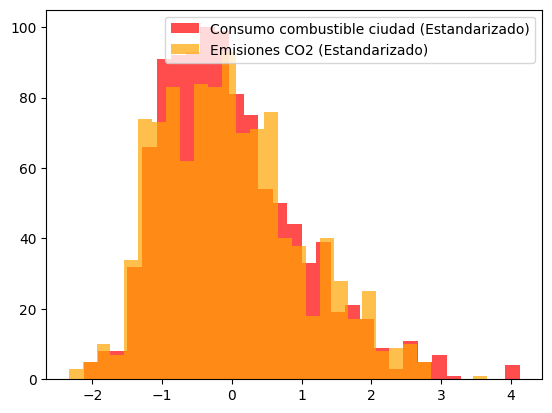

In [118]:
#estandarizamos y volvemos a pintar el histograma
media_con = np.mean(city_consumption)
desv_con = np.std(city_consumption)
media_co2 = np.mean(co2_emissions)
desv_co2 =  np.std(co2_emissions)

#resultado1 = [(x - media_con) / desv_con for x in city_consumption]
resultado1 = (city_consumption - media_con) / desv_con
#resultado2 = [(x - media_co2) / desv_co2 for x in co2_emissions]
resultado2 = (co2_emissions - media_co2) / desv_co2

print(f"Media consumo original: {media_con}")
print(f"Media consumo estandarizada: {resultado1}")
print(f"Emisiones Co2 original: {media_co2}")
print(f"Emisiones Co2 original: {resultado2}")

plt.hist(resultado1, bins=30, color="red", alpha=0.7, label="Consumo combustible ciudad (Estandarizado)")
#plt.hist(city_consumption, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (original)")
#plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
plt.hist(resultado2, bins=30, color="orange", alpha=0.7, label="Emisiones CO2 (Estandarizado)")
plt.legend();

## SUBPLOTS

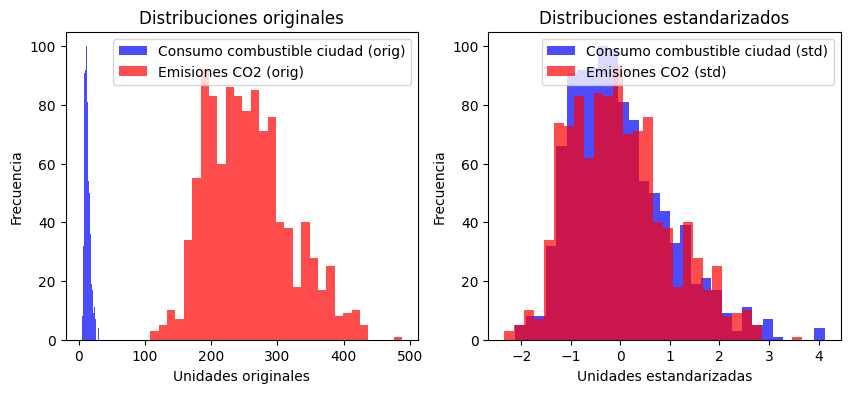

In [121]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(city_consumption, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (orig)")
plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (orig)")
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(resultado1, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (std)")
plt.hist(resultado2, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (std)")
plt.title("Distribuciones estandarizados")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend()
